<a href="https://colab.research.google.com/github/Althaf12344/ml-zero-to-1/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
x,y=make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0 ,n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False , class_sep=10)

In [2]:
x

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [3]:
import matplotlib.pyplot as plt

'\n plt.figure(figsize=(10,6))\nsets the size of the plot to 10 inches wide and 6 inches tall for better visibility.\n\n2. plt.scatter(X[:,0], X[:,1], ...)\nPlots the data points using the first feature on the x-axis and second feature on the y-axis.\n\n3. c=y\nColors each point based on its class label (0 or 1), so you can visually separate classes.\n\n4. cmap=\'winter\'\nUses the "winter" color map, which gives cool tones (green/blue) to distinguish classes.\n\n 5. s=100\nSets the size of the scatter points to 100 for better visibility in the plot.'

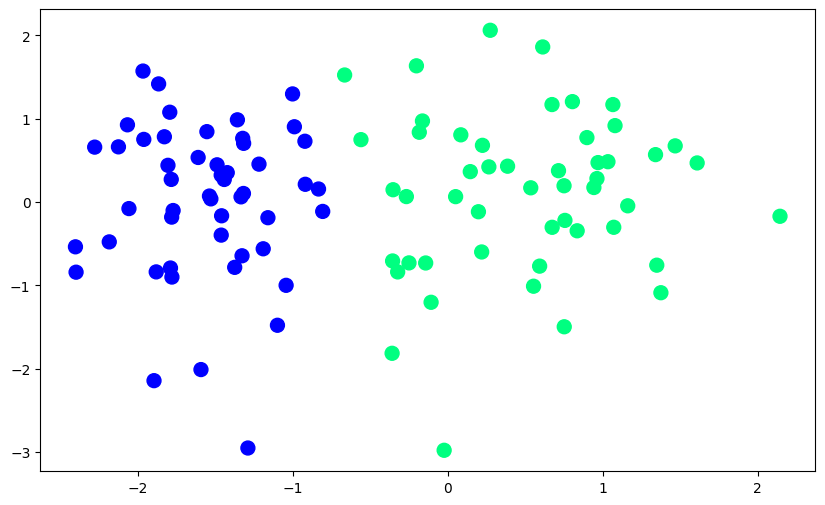

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y,cmap='winter',s=100)

'''
 plt.figure(figsize=(10,6))
sets the size of the plot to 10 inches wide and 6 inches tall for better visibility.

2. plt.scatter(X[:,0], X[:,1], ...)
Plots the data points using the first feature on the x-axis and second feature on the y-axis.

3. c=y
Colors each point based on its class label (0 or 1), so you can visually separate classes.

4. cmap='winter'
Uses the "winter" color map, which gives cool tones (green/blue) to distinguish classes.

 5. s=100
Sets the size of the scatter points to 100 for better visibility in the plot.'''

In [5]:
def perceptron(x,y):

  x=np.insert(x,0,1,axis=1)#Adds a column of 1s at the beginning of each input row in X
  weights=np.ones(x.shape[1])  # Creates a weight vector with all values set to 1, one for each feature plus bias.

  lr=0.1  # this is learning rate

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=step(np.dot(x[j],weights))
    weights= weights + lr*(y[j]-y_hat)*x[j]

  return weights[0],weights[1:]

In [6]:
def step(z):
    return 1 if z>0 else 0  # here >0 means the student got placement if got placed then 1     unplaced = 0

In [7]:
intercept_,coef_ = perceptron(x,y)

In [8]:
print(coef_)

[1.31539324 0.18529349]


In [9]:
print(intercept_)

1.0


In [10]:
m=-(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

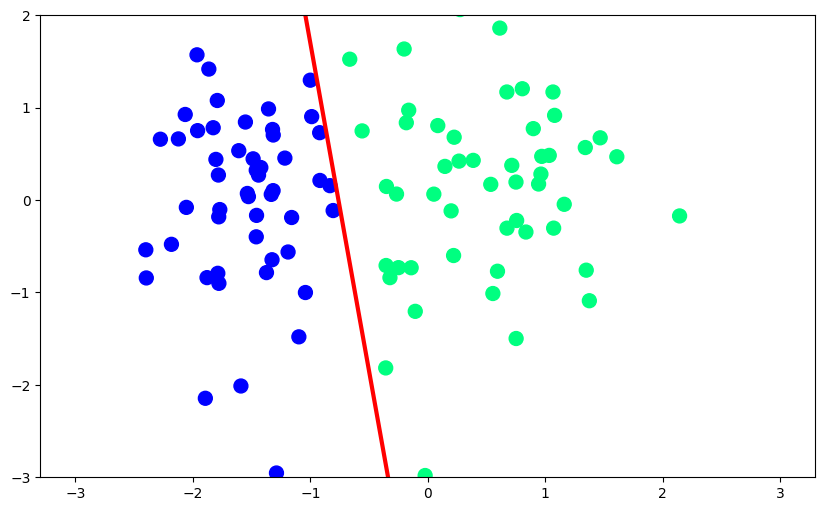

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color='red', linewidth=3)
plt.scatter(x[:,0], x[:,1] , c=y , cmap='winter', s=100)
plt.ylim(-3,2)


In [13]:
def perceptron(X,y):

    m = []
    b = []

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [14]:
m,b = perceptron(x,y)

In [15]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [16]:
m = np.linspace(-1, 1, 200)
b = np.linspace(0, 1, 200)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate dummy training data
x = np.random.randn(100, 2)
y = np.random.randint(0, 2, size=100)

# Simulated values of m and b over 200 steps (like training epochs)
m = np.linspace(-1, 1, 200)
b = np.linspace(-0.5, 0.5, 200)

# Prepare the figure
fig, ax = plt.subplots(figsize=(9, 5))
x_i = np.linspace(-3, 3, 100)
y_i = m[0] * x_i + b[0]

# Plot the scatter and initial line
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, y_i, 'r-', linewidth=2)
ax.set_ylim(-3, 3)

# Update function for animation
def update(i):
    line.set_ydata(m[i] * x_i + b[i])
    ax.set_xlabel(f"Epoch {i + 1}")
    return line, ax

# Animate
anim = FuncAnimation(fig, update, frames=len(m), interval=100, blit=False)

# Required to display animation in some environments
plt.show()

<IPython.core.display.Javascript object>

In [17]:
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [19]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [20]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)

In [22]:
m = np.linspace(-1, 1, 200)
b = np.linspace(0, 1, 200)

fig, ax = plt.subplots(figsize=(9, 5))
x_i = np.arange(-3, 3, 0.1)
y_i = x_i * m[0] + b[0]

ax.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, y_i, 'r-', linewidth=2)
plt.ylim(-3, 3)

def update(i):
    label = f'epoch {i + 1}'
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
plt.show()



<IPython.core.display.Javascript object>